In [1]:
#!pip install neuralprophet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet
import pickle

plt.rcParams.update({'figure.facecolor':'white'})

In [3]:
from neuralprophet import NeuralProphet

In [4]:
df_NH = pd.read_csv('data/NH_modelling.csv')

In [5]:
df_NH

,date,Extent
0,1978-10-26,10.231
1,1978-10-28,10.420
2,1978-10-30,10.557
3,1978-11-01,10.670
4,1978-11-03,10.777
...,...,...
14178,2022-02-28,14.671
14179,2022-03-01,14.693
14180,2022-03-02,14.765
14181,2022-03-03,14.703


In [6]:
df_NH.isnull().sum()

date      0
Extent    0
dtype: int64

In [7]:
df_NH.shape

(14183, 2)

In [8]:
df_NH['date'] = pd.to_datetime(df_NH['date'])
df_NH.head(2)

,date,Extent
0,1978-10-26,10.231
1,1978-10-28,10.420


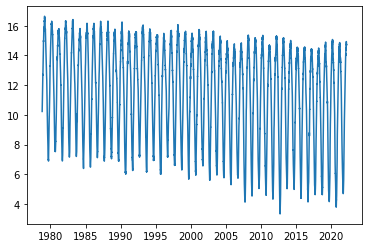

In [9]:
plt.plot(df_NH['date'], df_NH['Extent'])
plt.show()

In [10]:
df_NH = df_NH[['date', 'Extent']]
df_NH.dropna(inplace=True)
df_NH.columns = ['ds', 'y']

In [11]:
df_NH.shape

(14183, 2)

# Simple Model

### Train the Model

**A simple model with neural_prophet for this dataset can be fitted by creating an object of the NeuralProphet class and calling the fit function. This fits a model with the default settings in the model. The frequency of data is set globally here.**

In [12]:
m = NeuralProphet()
#m.fit(df_NH, freq='D', epochs=1000)
model = m.fit(df_NH, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 53
 90%|████████▉ | 275/307 [00:00<00:00, 637.38it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.16E-02, min: 2.11E+00
 89%|████████▉ | 273/307 [00:00<00:00, 727.01it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.16E-02, min: 2.25E+00
 89%|████████▊ | 272/307 [00:00<00:00, 676.07it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.16E-02, min: 2.41E+0

**Once the model is fitted, we can make predictions using the fitted model. Here we are predicting in-sample over our data to evaluate the model fit. We could do the same for a holdout set.**

In [13]:
future = m.make_future_dataframe(df_NH, periods=365*100)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /Users/aanysofia/neuefische/ice_cream/.venv/lib/python3.9/site-packages/neuralprophet/forecaster.py:1068: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2022-03-05,None,14.269993,NaN,10.247626,4.021348,0.001017
1,2022-03-06,None,14.265306,NaN,10.247517,4.021051,-0.003261
2,2022-03-07,None,14.267991,NaN,10.247406,4.019608,0.000976
3,2022-03-08,None,14.267522,NaN,10.247295,4.017045,0.003182
4,2022-03-09,None,14.257712,NaN,10.247185,4.013391,-0.002864


### Plotting

With the forecasts obtained from the model, we can visualize them.

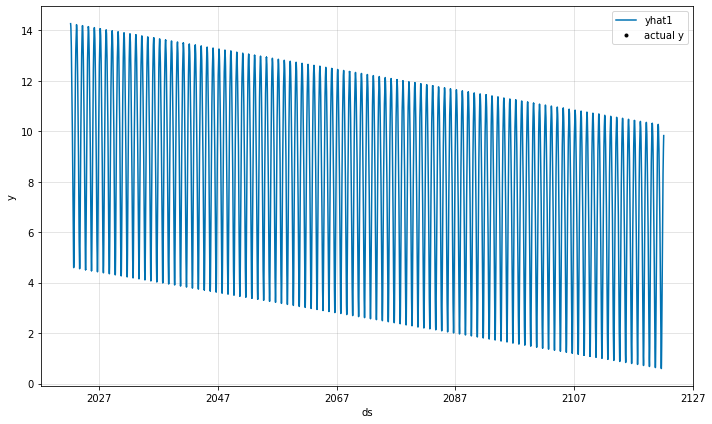

In [14]:
plot1 = m.plot(forecast)

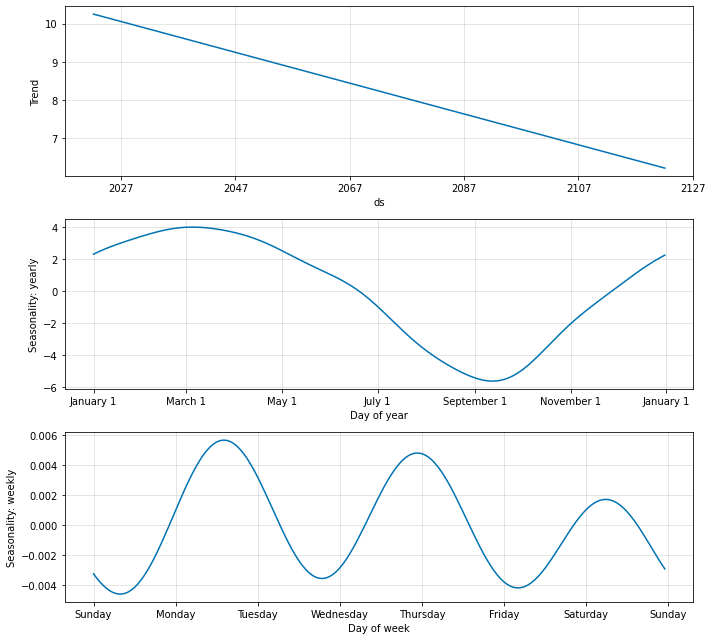

In [15]:
plt2 = m.plot_components(forecast)

The individual coefficient values can also be plotted as below to gain further insights.

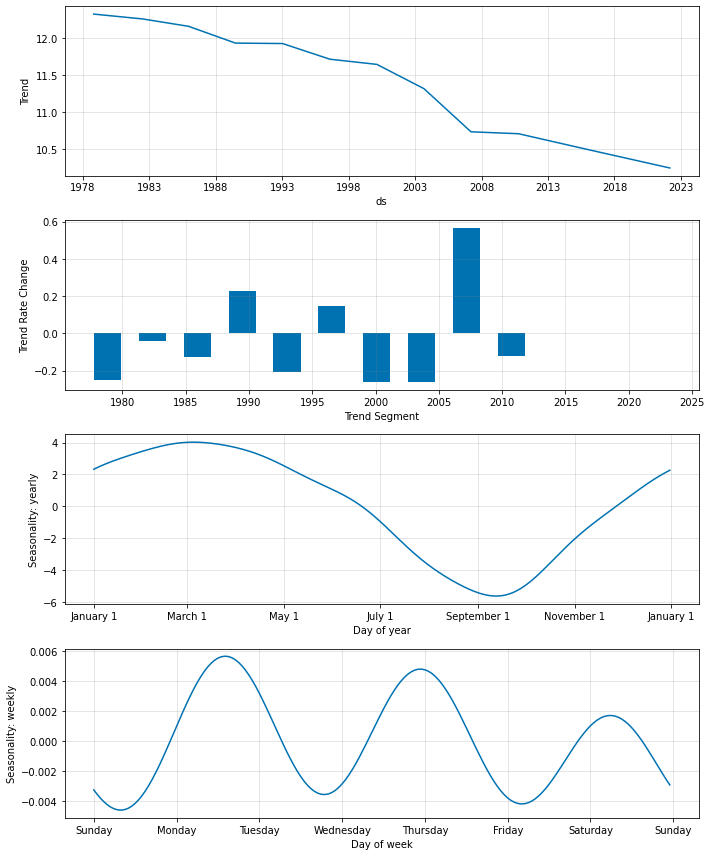

In [16]:
fig_param = m.plot_parameters()

# From Neural Prophet Website

In [17]:
m = NeuralProphet()
metrics = m.fit(df_NH, freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 53
 92%|█████████▏| 281/307 [00:00<00:00, 796.16it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.44E-02, min: 1.97E+00
 93%|█████████▎| 285/307 [00:00<00:00, 763.68it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.15E-02, min: 1.61E+00
 92%|█████████▏| 283/307 [00:00<00:00, 821.60it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.75E-02, min: 1.84E+0

In [18]:
predicted = m.predict(df_NH)
forecast = m.predict(df_NH)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


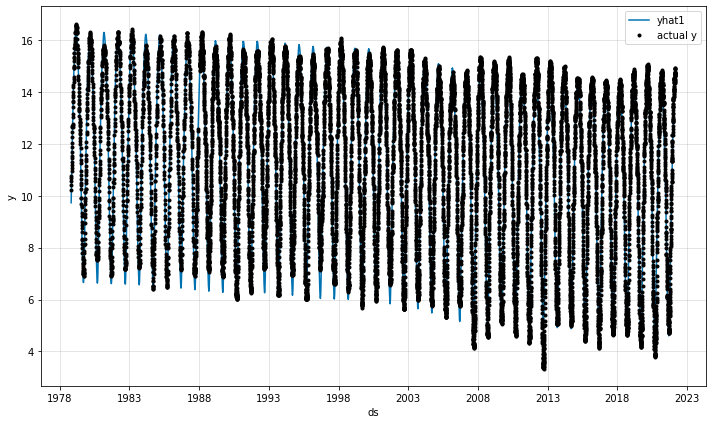

In [19]:
forecasts_plot = m.plot(forecast)

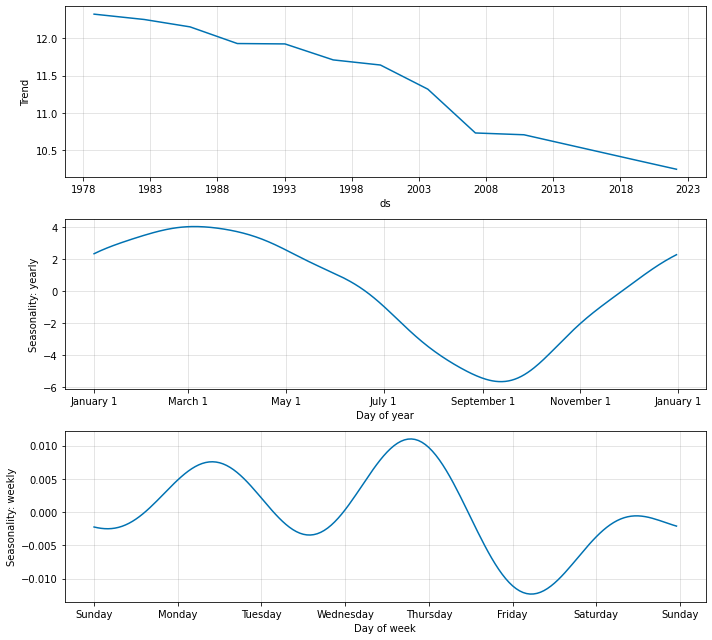

In [20]:
fig_comp = m.plot_components(forecast)

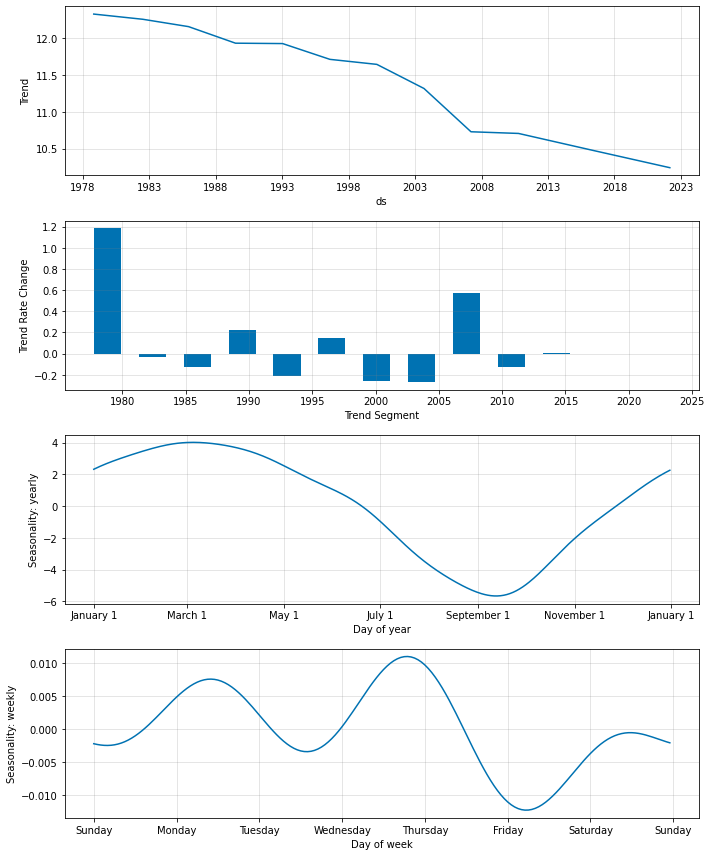

In [21]:
fig_param = m.plot_parameters()

### Validation

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
m = NeuralProphet()
df_NH_train, df_NH_test = m.split_df(df_NH, valid_p=0.86)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D


In [24]:
train_metrics = m.fit(df_NH_train)
test_metrics = m.test(df_NH_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency 2D corresponds to 81.067% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 2D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100
 95%|█████████▌| 252/265 [00:00<00:00, 935.89it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.93E-02, min: 1.97E+00
 94%|█████████▎| 248/265 [00:00<00:00, 750.24it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.93E-02, min: 2.14E+00
 93%|█████████▎| 247/265 [00:00<00:00, 955.45it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.93E-02, min: 1.44E+00
INF

we can also perform validation per every epoch during model fitting. This is done as follows by setting the validate_each_epoch argument in the fit function call. 

In [25]:
# or evaluate while training
m = NeuralProphet()
metrics = m.fit(df_NH_train, validation_df=df_NH_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency 2D corresponds to 81.067% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 2D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100
 92%|█████████▏| 245/265 [00:00<00:00, 915.12it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.22E-02, min: 8.33E-01
 93%|█████████▎| 246/265 [00:00<00:00, 907.54it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.90E-02, min: 9.74E-01
 91%|█████████▏| 242/265 [00:00<00:00, 963.15it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.22E-02, min: 1.23E+00
INF

In [26]:
from neuralprophet import set_random_seed 
set_random_seed(0)

# Modelling Trend

In [27]:
m = NeuralProphet(
    n_changepoints=100,
    trend_reg=2, 
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df_NH, freq="D")
forecast = m.predict(df_NH)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 53
 87%|████████▋ | 266/307 [00:00<00:00, 496.18it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.15E-01, min: 1.72E-03
 87%|████████▋ | 267/307 [00:00<00:00, 559.00it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.96E+00, min: 1.50E-03
 84%|████████▎ | 257/307 [00:00<00:00, 600.08it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.15E-01, min: 1.31E-03
INFO - (NP.forecaster._init_train_loader) -

### Component plot

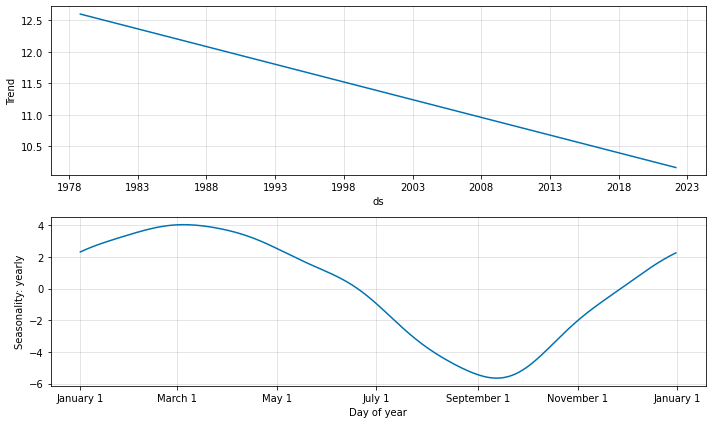

In [28]:
fig_comp = m.plot_components(forecast)

### Coefficient Plot

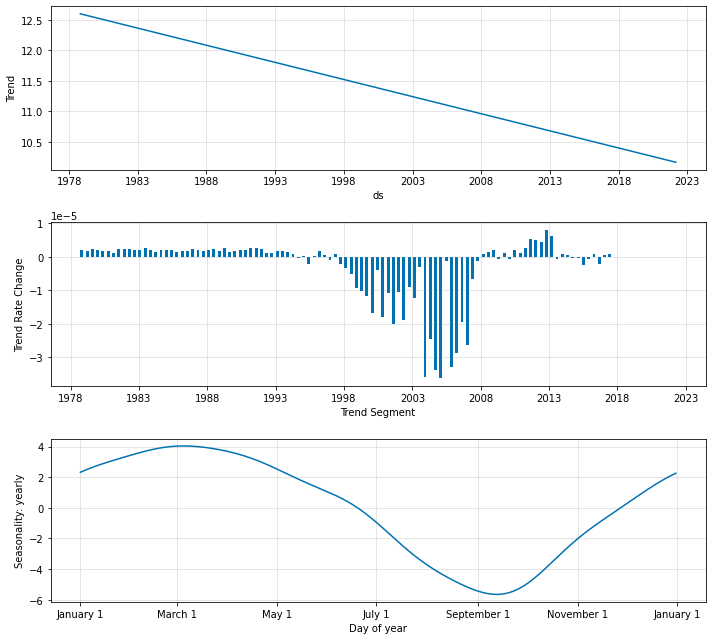

In [29]:
fig_param = m.plot_parameters()

# Modelling Seasonality

### Additive Seasonality

In [30]:
m = NeuralProphet(
    yearly_seasonality=10,
    weekly_seasonality=False
)
metrics = m.fit(df_NH, freq="D")
forecast = m.predict(df_NH)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 53
 89%|████████▊ | 272/307 [00:00<00:00, 868.31it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.87E-02, min: 1.61E+00
 89%|████████▉ | 274/307 [00:00<00:00, 751.69it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.38E-02, min: 1.23E+00
 89%|████████▉ | 274/307 [00:00<00:00, 771.46it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.38E-02, min: 1.40E+0

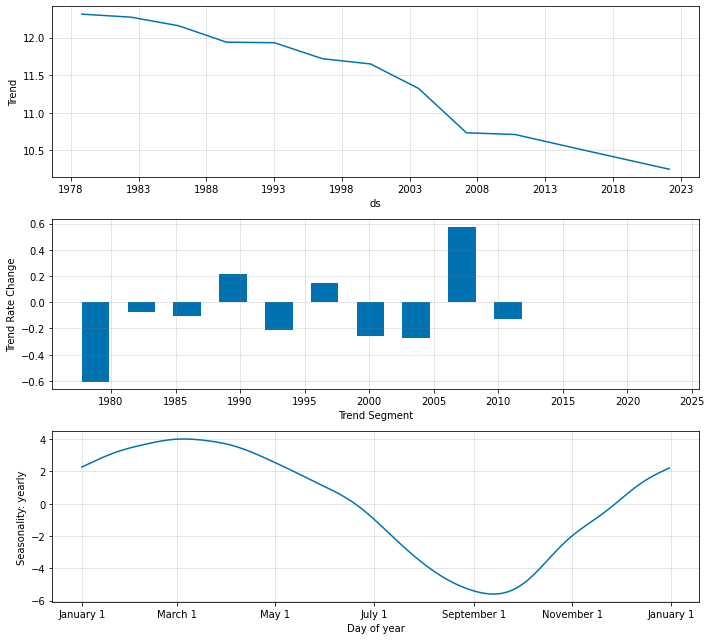

In [31]:
fig_param = m.plot_parameters(forecast)


### Regularize Seasonality

INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 53
 99%|█████████▊| 303/307 [00:00<00:00, 929.28it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.63E-02, min: 2.96E+00
100%|█████████▉| 306/307 [00:00<00:00, 947.82it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.63E-02, min: 3.16E+00
100%|█████████▉| 306/307 [00:00<00:00, 948.40it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.13E-02, min: 2.11E+00
INFO - (NP.forecaster._init_train_l

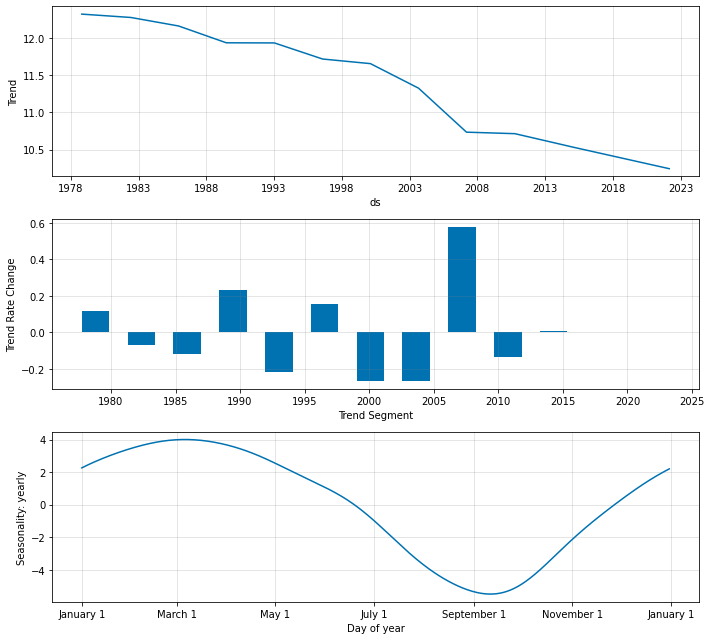

In [32]:
m = NeuralProphet(
    yearly_seasonality=8,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_reg=1,
)
metrics = m.fit(df_NH, freq="D")
forecast = m.predict(df_NH)
fig_param = m.plot_parameters(forecast)

# Modelling Auto-Regression

AR-Net can be enabled in the NeuralProphet by simply setting an appropriate value to the n_lags parameter of the NeuralProphet object.

In [33]:
m = NeuralProphet(
    n_forecasts=3,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df_NH, freq="D")


WARNING - (NP.forecaster.__init__) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 53
 94%|█████████▍| 289/307 [00:00<00:00, 624.17it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.75E-02, min: 3.38E+00
 95%|█████████▌| 293/307 [00:00<00:00, 794.74it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.08E-02, min: 3.38E+00
 93%|█████████▎| 286/307 [00:00<00:00, 734.69it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5

In [34]:
forecast = m.predict(df_NH)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


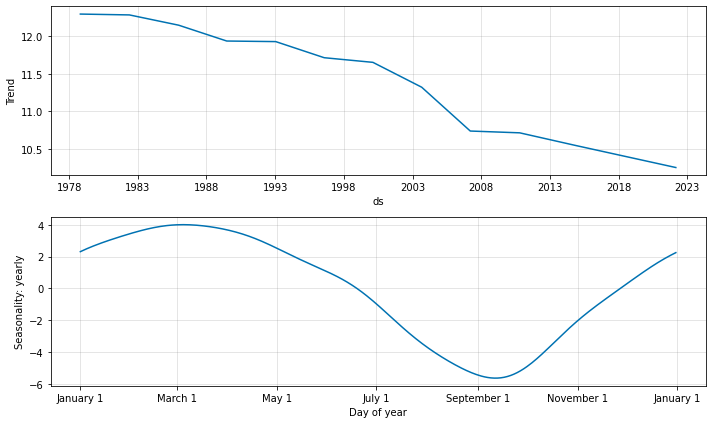

In [35]:
fig_comp = m.plot_components(forecast)

# Train & test a model

In [36]:
m = NeuralProphet(seasonality_mode= "additive", learning_rate = 0.1)

#df = pd.read_csv(data_location + "air_passengers.csv")
df_train, df_test = m.split_df(df=df_NH, freq="MS", valid_p=0.866)

metrics_train = m.fit(df=df_train, freq="MS")
metrics_test = m.test(df=df_test)

metrics_test

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency 2D corresponds to 84.692% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency 2D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 101
Epoch[101/101]: 100%|██████████| 101/101 [00:02<00:00, 36.63it/s, SmoothL1Loss=0.000244, MAE=0.171, RMSE=0.212, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.984% of the data.
WARNING -

,SmoothL1Loss,MAE,RMSE
0,0.054831,2.771112,2.819228


### Predict into future

In [37]:
metrics_train2 = m.fit(df=df_NH, freq="MS")
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=48)
forecast = m.predict(future)
fig = m.plot(forecast)

ERROR - (NP.forecaster.fit) - Model has already been fitted. Re-fitting may break or produce different results.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.627% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D


TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'